# "Momentum" Trading Strategy
* It is a trend following strategy where the trader go long in an uptrend and go short in a downtrend
* This algorithm will develop trading signals for Banknifty Index

In [67]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf


### 1. Download data: 
* Getting the data from Yahoo Finance API

In [68]:
nfb = yf.download('^NSEBANK')
day = np.arange(1,len(nfb)+1)
nfb['day'] = day
nfb.drop(columns=['Adj Close','Volume'], inplace = True)
nfb = nfb[['day','Open','High','Low','Close']]
nfb.head()

[*********************100%%**********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2007-09-17,1,6898.000000,6977.200195,6843.000000,6897.100098
2007-09-18,2,6921.149902,7078.950195,6883.600098,7059.649902
2007-09-19,3,7111.000000,7419.350098,7111.000000,7401.850098
2007-09-20,4,7404.950195,7462.899902,7343.600098,7390.149902
2007-09-21,5,7378.299805,7506.350098,7367.149902,7464.500000


In [69]:
nfb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3766 entries, 2007-09-17 to 2024-03-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     3766 non-null   int32  
 1   Open    3766 non-null   float64
 2   High    3766 non-null   float64
 3   Low     3766 non-null   float64
 4   Close   3766 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 161.8 KB


### 2. Add data/transform data
* Calculate signal based on statistical action
* We are going to use Moving Average Crossover Strategy (9 days and 21 days MA Crossover) to generate Trading Signals

#### Add moving averages to the data frame

In [70]:
nfb['9-day'] = nfb['Close'].rolling(9).mean()
nfb['21-day'] = nfb['Close'].rolling(21).mean()
nfb[19:25]

C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\1558874066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfb['9-day'] = nfb['Close'].rolling(9).mean()
C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\1558874066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfb['21-day'] = nfb['Close'].rolling(21).mean()


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2007-10-15,20,7962.549805,8306.349609,7962.549805,8286.299805,7990.116591,NaN
2007-10-16,21,8361.400391,8491.650391,8240.299805,8452.200195,8029.483290,7784.561872
2007-10-17,22,8071.549805,8218.099609,7641.500000,8099.899902,8036.594401,7841.838053
2007-10-18,23,8055.149902,8192.450195,7519.700195,7608.750000,8010.316623,7867.985677
2007-10-19,24,7637.399902,7718.899902,7279.299805,7423.799805,7987.805501,7869.030901
2007-10-22,25,7374.350098,7621.649902,7289.200195,7568.000000,7951.377713,7877.499953


#### Adding the "signal" column  ('1' to Buy, '0' to Sell and '-1' to Short)

In [71]:
nfb['signal'] = np.where(nfb['9-day'] > nfb['21-day'], 1, 0)
nfb['signal'] = np.where(nfb['9-day'] < nfb['21-day'], -1, nfb['signal'])
nfb.dropna(inplace=True)
nfb.head()

C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\2380010738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfb['signal'] = np.where(nfb['9-day'] > nfb['21-day'], 1, 0)
C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\2380010738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfb['signal'] = np.where(nfb['9-day'] < nfb['21-day'], -1, nfb['signal'])
C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\2380010738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2007-10-16,21,8361.400391,8491.650391,8240.299805,8452.200195,8029.483290,7784.561872,1
2007-10-17,22,8071.549805,8218.099609,7641.500000,8099.899902,8036.594401,7841.838053,1
2007-10-18,23,8055.149902,8192.450195,7519.700195,7608.750000,8010.316623,7867.985677,1
2007-10-19,24,7637.399902,7718.899902,7279.299805,7423.799805,7987.805501,7869.030901,1
2007-10-22,25,7374.350098,7621.649902,7289.200195,7568.000000,7951.377713,7877.499953,1


#### Calculate Instantaneous Returns (System Returns) and Buy & Hold Returns (Return)

In [72]:
nfb['return'] = np.log(nfb['Close']).diff()
nfb['system_return'] = nfb['signal'] * nfb['return']
nfb['entry'] = nfb.signal.diff()
nfb.head()

C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\631030039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfb['return'] = np.log(nfb['Close']).diff()
C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\631030039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfb['system_return'] = nfb['signal'] * nfb['return']
C:\Users\Nakshatra\AppData\Local\Temp\ipykernel_17776\631030039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2007-10-16,21,8361.400391,8491.650391,8240.299805,8452.200195,8029.483290,7784.561872,1,NaN,NaN,NaN
2007-10-17,22,8071.549805,8218.099609,7641.500000,8099.899902,8036.594401,7841.838053,1,-0.042575,-0.042575,0.0
2007-10-18,23,8055.149902,8192.450195,7519.700195,7608.750000,8010.316623,7867.985677,1,-0.062553,-0.062553,0.0
2007-10-19,24,7637.399902,7718.899902,7279.299805,7423.799805,7987.805501,7869.030901,1,-0.024608,-0.024608,0.0
2007-10-22,25,7374.350098,7621.649902,7289.200195,7568.000000,7951.377713,7877.499953,1,0.019238,0.019238,0.0


#### Plotting the Trades on Time Series

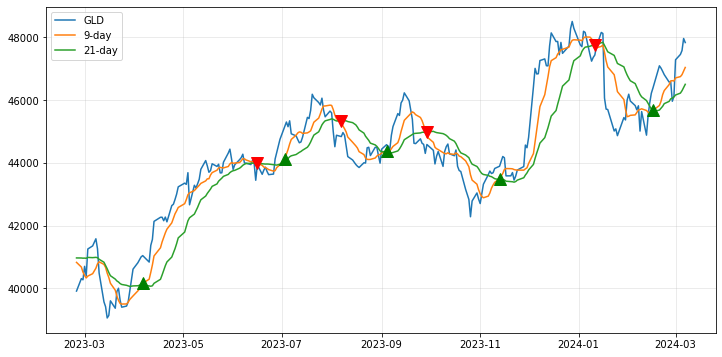

In [73]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(nfb.iloc[-252:]['Close'], label = 'GLD')
plt.plot(nfb.iloc[-252:]['9-day'], label = '9-day')
plt.plot(nfb.iloc[-252:]['21-day'], label = '21-day')
plt.plot(nfb[-252:].loc[nfb.entry == 2].index, nfb[-252:]['9-day'][nfb.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(nfb[-252:].loc[nfb.entry == -2].index, nfb[-252:]['21-day'][nfb.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

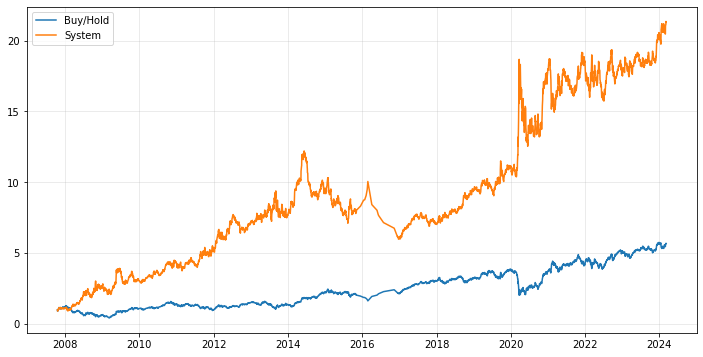

In [74]:
plt.plot(np.exp(nfb['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(nfb['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [75]:
np.exp(nfb['return']).cumprod()[-1] -1

4.659567884795192

In [76]:
np.exp(nfb['system_return']).cumprod()[-1] -1

20.299205747844788